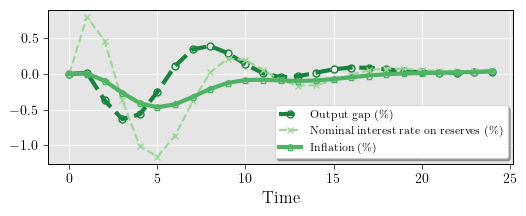

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.cm as cm 

 # I personally prefer seaborn for the graph style, but you may choose whichever you want.
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["figure.figsize"] = [6, 2]

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# rest of the code


# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 1

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/sigma * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Greens(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Greens(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=3, color=cm.Greens(150), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
#plt.title('RANK under perfect asset substitutability', fontsize=18)
plt.legend(loc='best', shadow=True, fancybox=True, facecolor="white", prop={'size': 8})
plt.xlabel('Time', horizontalalignment='center', fontsize=12, color='black')
plt.xticks(fontname="Computer Modern", fontsize=10, color="black") 
plt.yticks(fontname="Computer Modern", fontsize=10, color="black") 

# Aggiungi un bordo nero al grafico
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)
    
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontsize=14, color='black' )

#fig.set_size_inches((8, 6))
plt.savefig("RANK.eps" , bbox_inches="tight", format = "eps")
#plt.savefig("plot.jpg", dpi = 300)
#plt.savefig("plot.png", dpi = 300 )
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


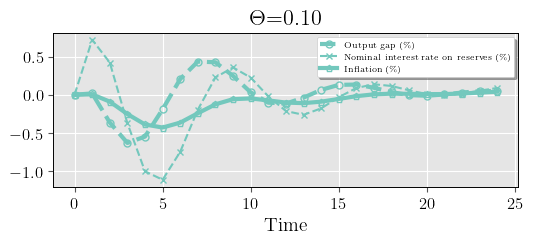

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


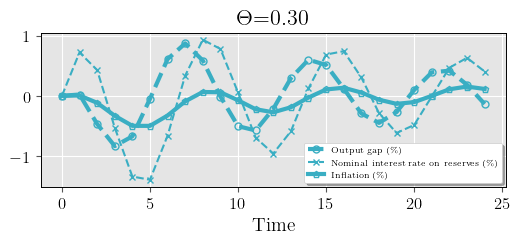

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


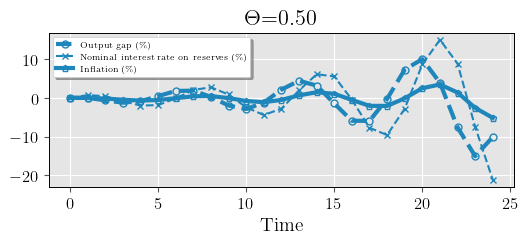

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


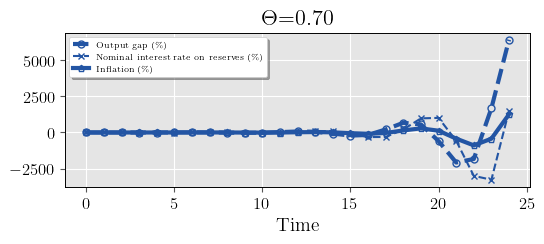

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


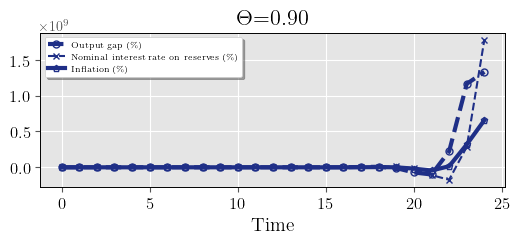

In [50]:
#contractionary monetary policy shock CLASSIC TANK
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
#theta=0.5
theta_values = np.arange(0.1, 0.99, 0.2)
colors = cm.YlGnBu(np.linspace(0.4, 0.9, len(theta_values)))

# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

for idx, theta in enumerate(theta_values):
# Solving the system of equations
    for t in range(1, T):
        x[t] = x[t-1] - 1/(sigma*(1-theta)) * (ir[t-1] - pi[t-1] - r_n)
        ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
        pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
    plt.plot(x, label=f'Output gap (\%)', linestyle= 'dashed', linewidth=3, color=colors[idx], marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
    plt.plot(ir, label=f'Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=colors[idx], marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
    plt.plot(pi, label=f'Inflation (\%)', linewidth=3, color=colors[idx], marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
    plt.title(f'$\Theta$={theta:.2f}', fontsize=16)
    plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
    plt.xlabel('Time', horizontalalignment='center', fontsize=14, color='black')
    #plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center',fontsize=14, color='black' )
    plt.xticks(fontsize=12, color="black") 
    plt.yticks(fontsize=12, color="black") 
    #print(x)
    #print(pi)
    
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.7)

    plt.savefig("TANKtheta.png" , bbox_inches="tight", format = "png")
    plt.show()

#print(x)
#print(pi)

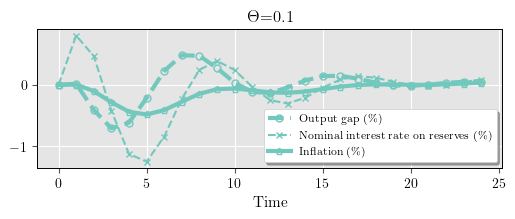

In [240]:
#contractionary monetary policy shock CLASSIC TANK
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 1.8]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.1
#theta_values = np.arange(0.1, 0.99, 0.2)
#colors = cm.YlGnBu(np.linspace(0.4, 0.9, len(theta_values)))

# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 1

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

#for idx, theta in enumerate(theta_values):
# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/(sigma*(1-theta)) * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label=f'Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.YlGnBu(0.4), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label=f'Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.YlGnBu(0.4), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label=f'Inflation (\%)', linewidth=3, color=cm.YlGnBu(0.4), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.title(f'$\Theta$=0.1', fontsize=12)
plt.legend(loc='lower right', shadow=True, prop={'size': 8, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center',fontsize=14, color='black' )
plt.xticks(fontsize=10, color="black") 
plt.yticks(fontsize=10, color="black") 
    #print(x)
    #print(pi)
    
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

plt.savefig("TANKtheta0.1n.png" , bbox_inches="tight", format = "png")
plt.show()

#print(x)
#print(pi)

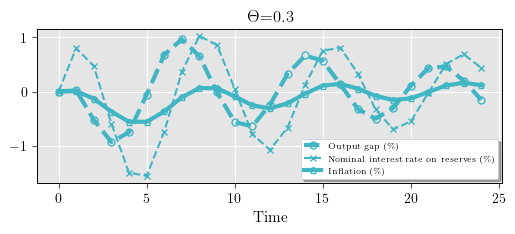

In [266]:
#contractionary monetary policy shock CLASSIC TANK
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.3
#theta_values = np.arange(0.1, 0.99, 0.2)
#colors = cm.YlGnBu(np.linspace(0.4, 0.9, len(theta_values)))

# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 1

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

#for idx, theta in enumerate(theta_values):
# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/(sigma*(1-theta)) * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label=f'Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.YlGnBu(0.5), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label=f'Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.YlGnBu(0.5), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label=f'Inflation (\%)', linewidth=3, color=cm.YlGnBu(0.5), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.title(f'$\Theta$=0.3', fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center',fontsize=14, color='black' )
plt.xticks(fontsize=10, color="black") 
plt.yticks(fontsize=10, color="black") 
    #print(x)
    #print(pi)
    
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

plt.savefig("TANKtheta0.3n.png" , bbox_inches="tight", format = "png")
plt.show()

#print(x)
#print(pi)

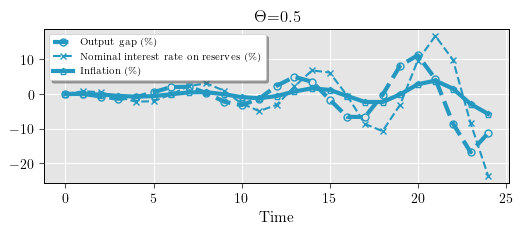

In [268]:
#contractionary monetary policy shock CLASSIC TANK
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.5
#theta_values = np.arange(0.1, 0.99, 0.2)
#colors = cm.YlGnBu(np.linspace(0.4, 0.9, len(theta_values)))

# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 1

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

#for idx, theta in enumerate(theta_values):
# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/(sigma*(1-theta)) * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label=f'Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.YlGnBu(0.6), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label=f'Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.YlGnBu(0.6), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label=f'Inflation (\%)', linewidth=3, color=cm.YlGnBu(0.6), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.title(f'$\Theta$=0.5', fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 7, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center',fontsize=14, color='black' )
plt.xticks(fontsize=10, color="black") 
plt.yticks(fontsize=10, color="black") 
    #print(x)
    #print(pi)
    
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

plt.savefig("TANKtheta0.5.png" , bbox_inches="tight", format = "png")
plt.show()

#print(x)
#print(pi)

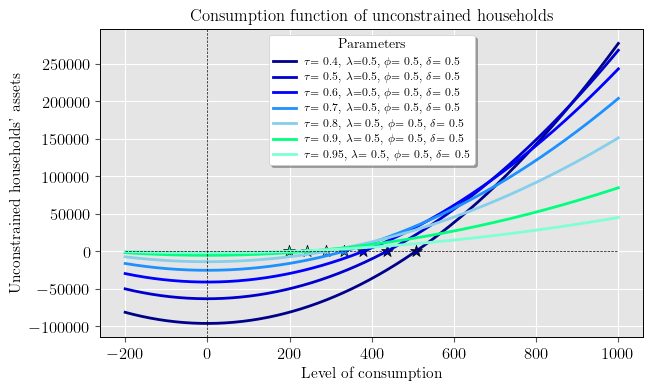

In [228]:
#Determinants of consumption from unconstrained households 
#QE 1 --asset purchase from households 
import matplotlib.pyplot as plt
import matplotlib.markers
import numpy as np

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [7, 4]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# create the x values
x = np.linspace(-200, 1000, 1000)


# calculate the y value for each element of the x vector
y1 = 0.373*x**2 + 0.368*x - 96112  
y2= 0.331*x**2 + 0.327*x - 63178
y3= 0.284*x**2 + 0.280*x - 40934
y4= 0.229*x**2 + 0.226*x - 25256
y5= 0.165*x**2 + 0.163*x - 13817
y6= 0.090*x**2 + 0.089*x - 5295
y61=0.047*x**2 + 0.046*x - 1866.9
y7= 0*x**2 + 0*x - 0


plt.style.use(style="ggplot")

xc1=np.array([507.36])
yc1=np.array([0])

xc2=np.array([436.33])
yc2=np.array([0])

xc3=np.array([379.38])
yc3=np.array([0])

xc4=np.array([331.61])
yc4=np.array([0])

xc5=np.array([288.64])
yc5=np.array([0])

xc6=np.array([241.96])
yc6=np.array([0])

xc61=np.array([198.46])
yc61=np.array([0])

plt.scatter(xc1,yc1, color= "darkblue", s=80, marker="*", edgecolors="black")
plt.scatter(xc2,yc2, color= "mediumblue", s=80, marker="*", edgecolors="black")
plt.scatter(xc3,yc3, color= "blue", s=80, marker="*", edgecolors="black")
plt.scatter(xc4,yc4, color= "dodgerblue", s=80, marker="*", edgecolors="black")
plt.scatter(xc5,yc5, color= "skyblue", s=80, marker="*", edgecolors="black")
plt.scatter(xc6,yc6, color= "springgreen", s=80, marker="*", edgecolors="black")
plt.scatter(xc61,yc61, color= "springgreen", s=80, marker="*", edgecolors="black")

plt.plot(x, y1, linewidth=2, color='darkblue', label= r"$\tau$= 0.4, $\lambda$=0.5, $\phi$= 0.5, $\delta$= 0.5")
plt.plot(x, y2, linewidth=2, color='mediumblue', label= r"$\tau$= 0.5, $\lambda$=0.5, $\phi$= 0.5, $\delta$= 0.5")
plt.plot(x, y3, linewidth=2, color='blue', label= r"$\tau$= 0.6, $\lambda$=0.5, $\phi$= 0.5, $\delta$= 0.5")
plt.plot(x, y4, linewidth=2, color='dodgerblue', label= r"$\tau$= 0.7, $\lambda$=0.5, $\phi$= 0.5, $\delta$= 0.5 ")
plt.plot(x, y5, linewidth=2, color='skyblue', label= r"$\tau$= 0.8, $\lambda$= 0.5, $\phi$= 0.5, $\delta$= 0.5")
plt.plot(x, y6, linewidth=2, color='springgreen', label= r"$\tau$= 0.9, $\lambda$= 0.5, $\phi$= 0.5, $\delta$= 0.5")
plt.plot(x, y61, linewidth=2, color='aquamarine', label= r"$\tau$= 0.95, $\lambda$= 0.5, $\phi$= 0.5, $\delta$= 0.5")
plt.plot(x, y7, linewidth=0.5, color='black', linestyle="dashed")
plt.axvline(x=0, linewidth=0.5, color='black', linestyle="dashed")


plt.legend( loc='best', shadow=True, framealpha=1, facecolor= "white", title="Parameters", prop={'size': 8, 'family': 'Arial'}, fancybox= "True")
plt.xticks(fontname="Arial", fontsize=12, color="black") 
plt.yticks(fontname="Arial", fontsize=12, color="black") 
plt.title(f'Consumption function of unconstrained households', fontname="Arial", fontsize=12)
plt.xlabel('Level of consumption', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
plt.ylabel("Unconstrained households' assets", horizontalalignment='center', fontname="Arial", fontsize=11, color='black')



#plt.savefig(r"C:\Users\clemenr\Desktop\Downloads")

#fig, ax = plt.subplots()
#ax.plot(x,y1, y2) #, y3, y4, y5)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

plt.savefig("consumption.png" , bbox_inches="tight", format = "png")

plt.show()

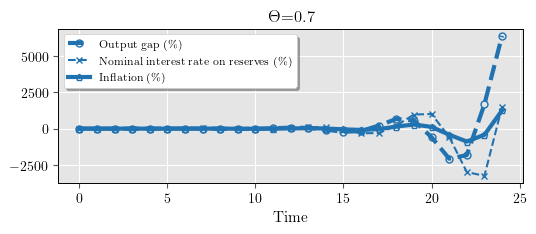

In [243]:
#contractionary monetary policy shock CLASSIC TANK
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.7
#theta_values = np.arange(0.1, 0.99, 0.2)
#colors = cm.YlGnBu(np.linspace(0.4, 0.9, len(theta_values)))

# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

#for idx, theta in enumerate(theta_values):
# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/(sigma*(1-theta)) * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label=f'Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.YlGnBu(0.7), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label=f'Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.YlGnBu(0.7), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label=f'Inflation (\%)', linewidth=3, color=cm.YlGnBu(0.7), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.title(f'$\Theta$=0.7', fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 8, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center',fontsize=14, color='black' )
plt.xticks(fontsize=10, color="black") 
plt.yticks(fontsize=10, color="black") 
    #print(x)
    #print(pi)
    
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

plt.savefig("TANKtheta0.7.png" , bbox_inches="tight", format = "png")
plt.show()

#print(x)
#print(pi)

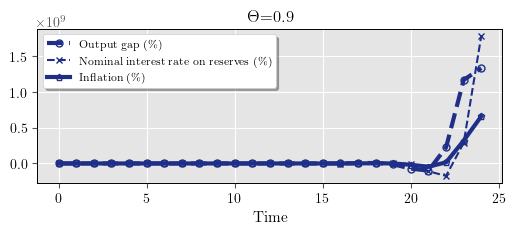

In [244]:
#contractionary monetary policy shock CLASSIC TANK
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Parameters
sigma = 2
beta = 0.9745
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.9
#theta_values = np.arange(0.1, 0.99, 0.2)
#colors = cm.YlGnBu(np.linspace(0.4, 0.9, len(theta_values)))

# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

#for idx, theta in enumerate(theta_values):
# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/(sigma*(1-theta)) * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label=f'Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.YlGnBu(0.9), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label=f'Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.YlGnBu(0.9), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label=f'Inflation (\%)', linewidth=3, color=cm.YlGnBu(0.9), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.title(f'$\Theta$=0.9', fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 8, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center',fontsize=14, color='black' )
plt.xticks(fontsize=10, color="black") 
plt.yticks(fontsize=10, color="black") 
    #print(x)
    #print(pi)
    
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

plt.savefig("TANKtheta0.9.png" , bbox_inches="tight", format = "png")
plt.show()

#print(x)
#print(pi)

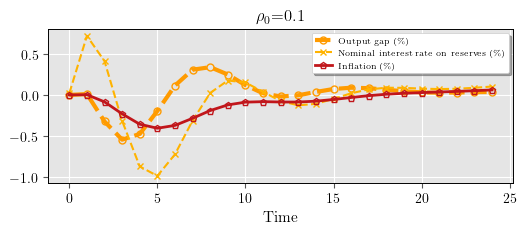

In [245]:
#1.3. impulse response novel RANK (yellow)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.1
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/rho)*x[t-1] +(mu[t]/rho)*(eta/sigma)*q[t]- (rho-mu[t]) /(sigma*rho) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Wistia(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Wistia(150), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(200), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(300), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(ib, label='ib', linewidth=3, color=cm.rainbow(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0 $=0.1', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black')
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black") 

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("RANKrho0.1.png" , bbox_inches="tight", format = "png")    
    
plt.show()



#high rho: expansionary monetary policy manouvre, therefore contractionary shock keeps inflation lower than in the other models. 



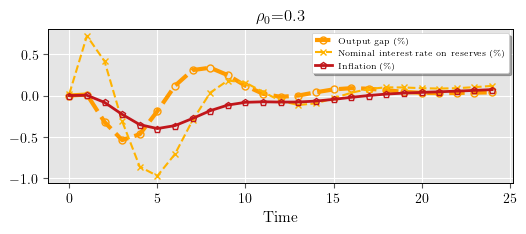

In [246]:
#1.3. impulse response novel RANK (yellow)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.3
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/rho)*x[t-1] +(mu[t]/rho)*(eta/sigma)*q[t]- (rho-mu[t]) /(sigma*rho) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Wistia(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Wistia(150), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(200), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(300), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(ib, label='ib', linewidth=3, color=cm.rainbow(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0 $=0.3', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black')
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black") 

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("RANKrho0.3.png" , bbox_inches="tight", format = "png")    
    
plt.show()



#high rho: expansionary monetary policy manouvre, therefore contractionary shock keeps inflation lower than in the other models. 



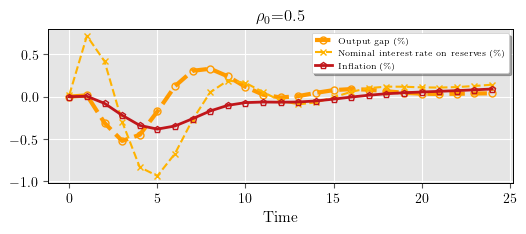

In [247]:
#1.3. impulse response novel RANK (yellow)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.5
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/rho)*x[t-1] +(mu[t]/rho)*(eta/sigma)*q[t]- (rho-mu[t]) /(sigma*rho) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Wistia(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Wistia(150), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(200), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(300), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(ib, label='ib', linewidth=3, color=cm.rainbow(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0 $=0.5', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black')
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black") 

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("RANKrho0.5.png" , bbox_inches="tight", format = "png")    
    
plt.show()



#high rho: expansionary monetary policy manouvre, therefore contractionary shock keeps inflation lower than in the other models. 



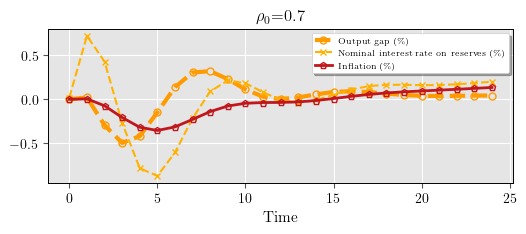

In [248]:
#1.3. impulse response novel RANK (yellow)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.7
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/rho)*x[t-1] +(mu[t]/rho)*(eta/sigma)*q[t]- (rho-mu[t]) /(sigma*rho) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Wistia(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Wistia(150), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(200), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(300), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(ib, label='ib', linewidth=3, color=cm.rainbow(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0 $=0.7', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black')
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black") 

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("RANKrho0.7.png" , bbox_inches="tight", format = "png")    
    
plt.show()



#high rho: expansionary monetary policy manouvre, therefore contractionary shock keeps inflation lower than in the other models. 



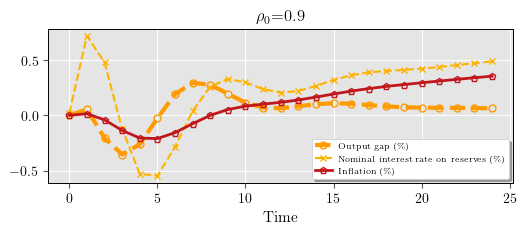

In [249]:
#1.3. impulse response novel RANK (yellow)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.9
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/rho)*x[t-1] +(mu[t]/rho)*(eta/sigma)*q[t]- (rho-mu[t]) /(sigma*rho) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Wistia(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Wistia(150), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(200), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(300), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(ib, label='ib', linewidth=3, color=cm.rainbow(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0 $=0.9', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black')
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black") 

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("RANKrho0.9.png" , bbox_inches="tight", format = "png")    
    
plt.show()



#high rho: expansionary monetary policy manouvre, therefore contractionary shock keeps inflation lower than in the other models. 



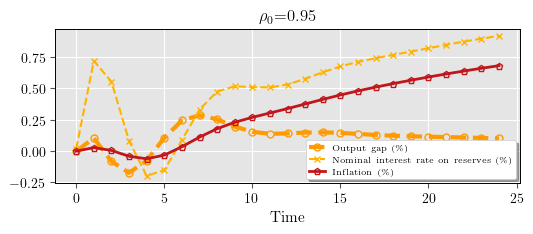

In [250]:
#1.3. impulse response novel RANK (yellow)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.95
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/rho)*x[t-1] +(mu[t]/rho)*(eta/sigma)*q[t]- (rho-mu[t]) /(sigma*rho) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 1.2 * pi[t-1] + 1.2 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Wistia(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Wistia(150), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(200), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(300), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(ib, label='ib', linewidth=3, color=cm.rainbow(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0 $=0.95', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 5.8, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black')
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black") 

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("RANKrho0.95.png" , bbox_inches="tight", format = "png")    
    
plt.show()



#high rho: expansionary monetary policy manouvre, therefore contractionary shock keeps inflation lower than in the other models. 



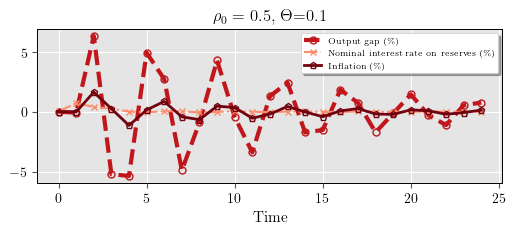

In [251]:
#1.4 last model: novel TANK (reds)
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.2
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.5


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.5$, $\Theta$=0.1', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.5THETA0.1.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

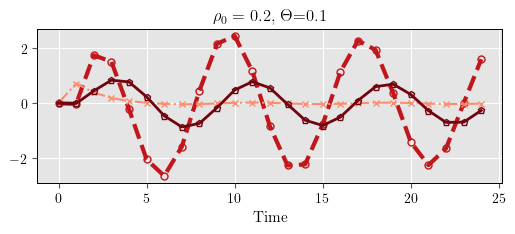

In [252]:
#1.4 last model: novel TANK (reds)
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.2
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.1


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.2$, $\Theta$=0.1', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 5, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.2THETA0.1.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

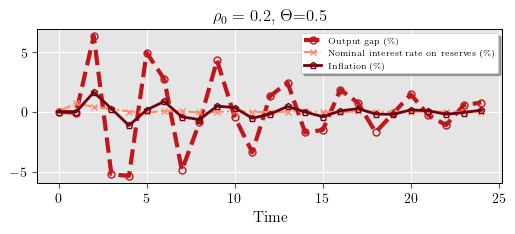

In [253]:
#1.4 last model: novel TANK (reds)
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.2
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.5


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.2$, $\Theta$=0.5', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.2THETA0.5.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

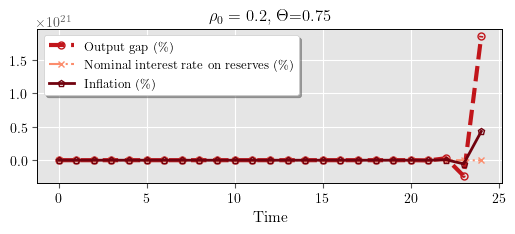

In [254]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.2
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.75


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.2$, $\Theta$=0.75', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.2THETA0.75.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

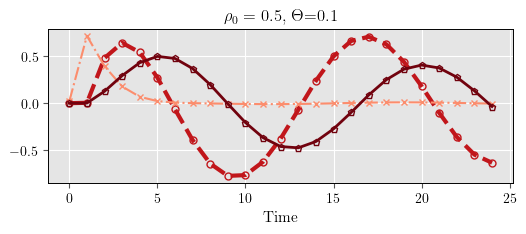

In [255]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.5
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.1


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.5$, $\Theta$=0.1', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.5THETA0.1.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

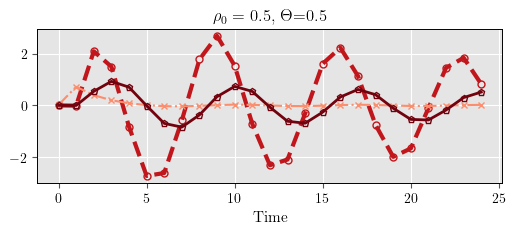

In [256]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.5
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.5


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.5$, $\Theta$=0.5', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.5THETA0.5.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

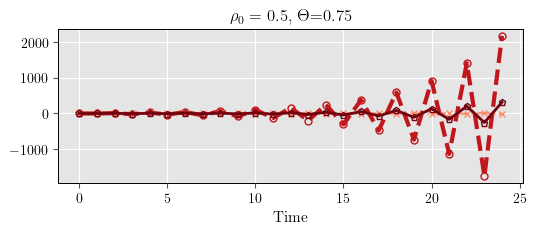

In [257]:
#not sure 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.5
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.75


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.5$, $\Theta$=0.75', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.5THETA0.75.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

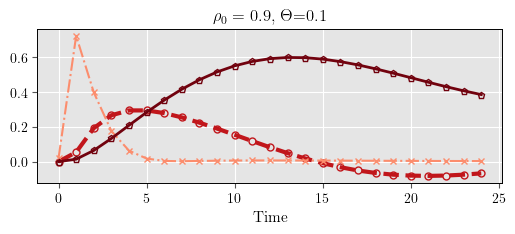

In [258]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.9
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.1


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.9$, $\Theta$=0.1', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.9THETA0.1.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

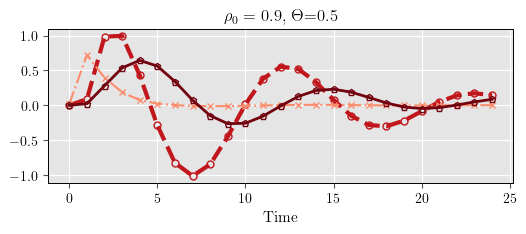

In [259]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.9
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.5


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.9$, $\Theta$=0.5', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.9THETA0.5.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

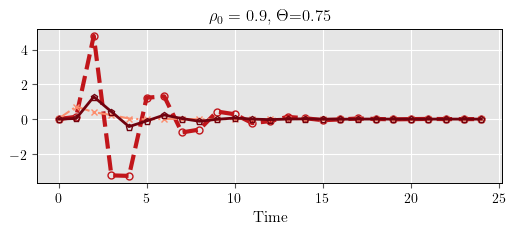

In [260]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.9
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.75


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.9$, $\Theta$=0.75', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 9, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.9THETA0.75.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

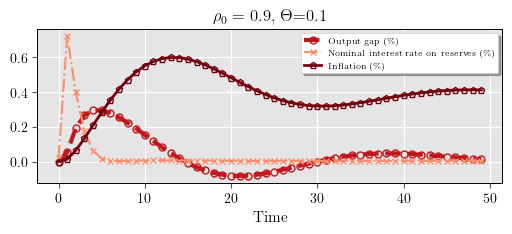

In [261]:
#for the appendix 
#THIS ONE NEEDS TO BE IMPLEMENTED 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# Define the parameters
sigma = 2
eta=sigma
rho=0.9
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.1


# Initialize the variables
T = 50
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5

# Shock
v[0] = 0.9

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
    ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
    pi[t] = beta * pi[t-1] + kappa * x[t]
    mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
    idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0=0.9$, $\Theta$=0.1', fontname="Arial", fontsize=12)
plt.legend(loc='best', shadow=True, prop={'size': 6, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")


for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.9THETA0.1_50p.png" , bbox_inches="tight", format = "png")    

plt.show()


#coefficient changed!!!!

#print(mu)
#print(idd)

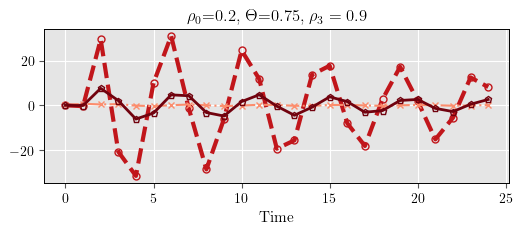

In [262]:
#1.4last model: novel TANK (reds)
#THIS ONE NEEDS TO BE IMPLEMENTED 
#with the shock on rho 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [6, 2]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')

# Define the parameters
sigma = 2
eta=sigma
rho=0.2
beta = 0.99
epsilon=10
phi=0.9
psi=100
kappa= (sigma+phi)*(epsilon-1)/psi
rn = 0.03
rho_v1 = 0.8
rho_v2 = -0.2
theta=0.75


# Initialize the variables
T = 25
x = np.zeros(T)
ir = np.full(T, 0.02)
pi = np.zeros(T)
v = np.zeros(T)
idd = np.full(T, 0.03) #depends on rho, add the Newton Rapson algorithm to find the intiial values 
mu = np.full(T, (rho/(1-rho))*(idd-ir) )#depends on rho, add the Newton Rapson algorithm to find the intiial values 
q=np.zeros(T)
q[:] = 0.5


# Shock
v[0] = 0.9


# Solving the system of equations
for t in range(1, T):
    if t<2:
        v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]
        x[t] = (1-mu[t]/((1-theta)*rho))*x[t-1] +(mu[t]/((1-theta)*rho))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
        ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
        pi[t] = beta * pi[t-1] + kappa * x[t]
        mu[t] = (rho/(1-rho))*(idd[t]-ir[t])
        idd[t] = idd[t-1]+ir[t]+(rho/(1-rho))*mu[t]

        rho = np.full(T, 0.2)    
    else:
        rho[2]= 0.9
        rho[t]= 0.9999*rho[t-1] 
        v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]
        x[t] = (1-mu[t]/((1-theta)*rho[t]))*x[t-1] +(mu[t]/((1-theta)*rho[t]))*(eta/sigma)*q[t]- (1/(sigma*(1-theta)))* ((1-1/(rho[t]*(1-theta)))) * (ir[t-1] - pi[t-1] - rn)
        ir[t] = 0.01 * pi[t-1] + 0.01 * x[t-1] + v[t]
        pi[t] = beta * pi[t-1] + kappa * x[t]
        mu[t] = (rho[t]/(1-rho[t]))*(idd[t]-ir[t])
        idd[t] = idd[t-1]+ir[t]+(rho[t]/(1-rho[t]))*mu[t]
    
    #ib[t] = ib[t-1] + (rho/(rho-mu[t]))*ir[t] - ib[t-1]
    

# Plotting the results
plt.plot(x, label='Output gap (%)', linestyle= 'dashed', linewidth=3, color=cm.Reds(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
plt.plot(ir, label='Nominal interest rate on reserves (%)', linestyle= 'dashdot', color=cm.Reds(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (%)', linewidth=2, color=cm.Reds(250), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(mu, label='mu', linewidth=3, color=cm.rainbow(50), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
#plt.plot(idd, label='id', linewidth=3, color=cm.rainbow(20), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')
plt.title(r'$\rho_0$=0.2, $\Theta$=0.75, $\rho_3=0.9$', fontname="Arial", fontsize=12)
#plt.legend(loc='best', shadow=True, prop={'size': 12, 'family': 'Arial'}, fancybox=True, facecolor="white")
plt.xlabel('Time', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontname="Arial", fontsize=14, color='black' )
#plt.ylim(0,10)
plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("TANKRHO0.2THETA0.75_shock.png" , bbox_inches="tight", format = "png")    


plt.show()


#impara a mettere lo zoom 
#coefficient changed!!!!

#print(mu)
#print(idd)

C:\Users\rober\AppData\Local\Temp/ipykernel_71792/4024780319.py:51: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, drawedges=False)
C:\Users\rober\AppData\Local\Temp/ipykernel_71792/4024780319.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(np.round(cbar.ax.get_yticks(),2), color="black", fontsize=12)


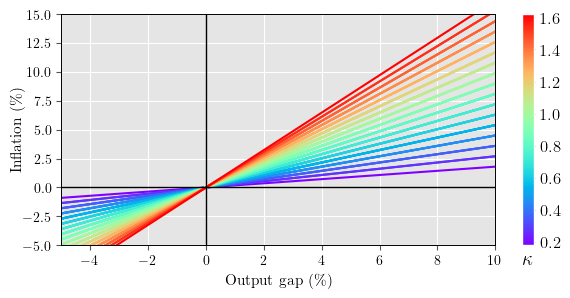

In [263]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [7, 3]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')


x = np.linspace(-10, 10, 1000)

def kappa(sigma, phi, epsilon, psi):
    return (sigma + phi) * (epsilon - 1) / psi

kappas = []
for sigma in range(1, 10):
    for phi in range(1, 10):
        epsilon = 10
        psi = 100
        kappas.append(kappa(sigma, phi, epsilon, psi))
        
# Normalize the kappas to the range [0,1]
norm = matplotlib.colors.Normalize(vmin=min(kappas), vmax=max(kappas))
cmap = cm.rainbow

for k in kappas:
    color = cmap(norm(k))
    y = [k * i for i in x]
    plt.plot(x, y, color= color)

#plt.xlim(-5,5)
#plt.ylim(-3,3)
plt.axvline(x=0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
#plt.title(r"Impact of the output gap's slope $\kappa$ on inflation", fontname="Arial", fontsize=16)
plt.xlabel('Output gap (\%)', horizontalalignment='center', fontname="Arial", fontsize=11, color='black')
plt.ylabel('Inflation (\%)',  verticalalignment='center', fontname="Arial", fontsize=11, color='black' )

# Add the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, drawedges=False)

cbar.ax.set_xlabel(r'$\kappa$', fontname="Arial", fontsize=14, rotation=0, color='black')
cbar.ax.tick_params(size=0.5)
cbar.ax.set_yticklabels(np.round(cbar.ax.get_yticks(),2), color="black", fontsize=12)


plt.xticks(fontname="Arial", fontsize=10, color="black") 
plt.yticks(fontname="Arial", fontsize=10, color="black")
plt.xlim(-5,10)
plt.ylim(-5,15)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)


plt.savefig("kappas.png" , bbox_inches="tight", format = "png")    


plt.show()



In [12]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [8]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


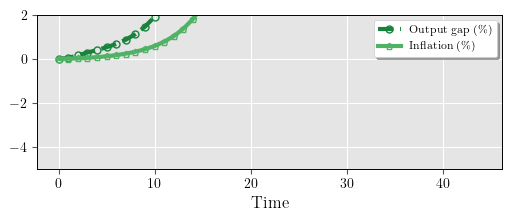

In [195]:
#FOR APPENDIX TO SHOW EQUIVALENCE WITH DYNARE 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.cm as cm 

 # I personally prefer seaborn for the graph style, but you may choose whichever you want.
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams["figure.figsize"] = [6, 2]

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "text.usetex" : True,
          'axes.facecolor': '#E5E5E5',
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.style.use('ggplot')
# rest of the code


# Parameters
sigma = 1
beta = 0.99
epsilon=10
phi=1
psi=100
kappa= 0.08 #(sigma+phi)*(epsilon-1)/psi
r_n = 0.03
rho_v1 = 0.9
#rho_v2 = -0.2


# Initialize the variables
T = 45
x = np.zeros(T)
ir = np.zeros(T)
pi = np.zeros(T)
v = np.zeros(T)

# Shock
v[0] =- 0.1

# AR(2) process for v_t
for t in range(1, T):
    v[t] = rho_v1 * v[t-1] + rho_v2 * v[t-2]

# Solving the system of equations
for t in range(1, T):
    x[t] = x[t-1] - 1/sigma * (ir[t-1] - pi[t-1] - r_n)
    ir[t] = 0.01+1.2* pi[t] + v[t-1] #+ 1.2 * x[t-1] 
    pi[t] = beta * pi[t-1] + kappa * x[t]

# Plotting the results
plt.plot(x, label='Output gap (\%)', linestyle= 'dashed', linewidth=3, color=cm.Greens(200), marker='o', markersize='5', markeredgewidth=1, markerfacecolor='None')    
#plt.plot(ir, label='Nominal interest rate on reserves (\%)', linestyle= 'dashed', color=cm.Greens(100), marker='x', markersize='5', markeredgewidth=1, markerfacecolor='None')  
plt.plot(pi, label='Inflation (\%)', linewidth=3, color=cm.Greens(150), marker='p', markersize='5', markeredgewidth=1, markerfacecolor='None')  
#plt.title('RANK under perfect asset substitutability', fontsize=18)
plt.legend(loc='best', shadow=True, fancybox=True, facecolor="white", prop={'size': 8})
plt.xlabel('Time', horizontalalignment='center', fontsize=12, color='black')
plt.xticks(fontname="Computer Modern", fontsize=10, color="black") 
plt.yticks(fontname="Computer Modern", fontsize=10, color="black") 

# Aggiungi un bordo nero al grafico
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)
    
#plt.ylabel('Inflation and output gap (%) ',  verticalalignment='center', fontsize=14, color='black' )

#fig.set_size_inches((8, 6))
plt.savefig("RANKapp.eps" , bbox_inches="tight", format = "eps")
#plt.savefig("plot.jpg", dpi = 300)
#plt.savefig("plot.png", dpi = 300 )
#plt.xlim(4,20)
plt.ylim(-5,2)

plt.show()

In [196]:
pip list 

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.


numba                              0.54.1
numexpr                            2.7.3
numpy                              1.20.3
numpydoc                           1.1.0
olefile                            0.46
openpyxl                           3.0.9
packaging                          21.0
pandas                             1.3.4
pandocfilters                      1.4.3
paramiko                           2.7.2
parso                              0.8.2
partd                              1.2.0
path                               16.0.0
pathlib2                           2.3.6
pathspec                           0.7.0
patsy                              0.5.2
pep8                               1.7.1
pexpect                            4.8.0
pickleshare                        0.7.5
Pillow                             8.4.0
pip                                21.2.4
pkginfo                            1.7.1
pluggy                             0.13.1
ply                                3.11
poyo         

In [197]:
print(np.__version__)

1.20.3


In [198]:
import numpy as np

beta, sigma, phi_pi, kappa, phi_y, rho_nu_1, rho_nu_2, rn_t = 0.99, 2, 1.2, 0.27, 1.2, 0.8, -0.2, 0.03

A = np.array([[1, 0], [0, 1]])
B = np.array([[0], [0]])
C = np.array([[-1/sigma, 0], [kappa, beta]])
D = np.array([[phi_pi/sigma, phi_y/sigma, -1/sigma, -1, 0], [0, 0, 0, 0, 1], [0, 0, rho_nu_1, rho_nu_2, 0]])

F = A - np.dot(np.dot(C, np.linalg.inv(B)), D)


LinAlgError: Last 2 dimensions of the array must be square

In [199]:
import numpy as np

# Define the system of equations
# In this example, we have a system of 2 equations with 2 endogenous variables
# The system can be written as: A * x_{t+1} = B * x_t + C * z_t
A = np.array([[1.2, -0.4], [-0.2, 1.1]])
B = np.array([[0.8, 0.2], [-0.1, 0.7]])
C = np.array([[0.3, 0.5], [-0.1, 0]])

# Define the eigenvalues of the A matrix
eig_vals = np.linalg.eigvals(A)

# Check the Blanchard and Khan conditions
if np.all(np.abs(eig_vals) < 1):
    print("The Blanchard and Khan conditions are satisfied.")
else:
    print("The Blanchard and Khan conditions are not satisfied.")

# Check the determinacy condition
if np.linalg.det(A) != 0:
    print("The system is determinate.")
else:
    print("The system is indeterminate.")

# Check the stability condition
if np.all(np.abs(np.linalg.eigvals(B)) < 1):
    print("The system is stable.")
else:
    print("The system is unstable.")


The Blanchard and Khan conditions are not satisfied.
The system is determinate.
The system is stable.


In [200]:
eig_vals

array([1.43722813, 0.86277187])

In [201]:
A

array([[ 1.2, -0.4],
       [-0.2,  1.1]])

In [204]:
B

array([[ 0.8,  0.2],
       [-0.1,  0.7]])